# Continuous Probabilistic Methods

Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

### 1. Using lemonade.csv dataset and focusing on continuous variables:

- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

- Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?

- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

### 2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

- Use a 2 sigma decision rule to isolate the outliers.

- Do these make sense?

- Should certain outliers be kept or removed?

### 3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv


In [1]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# getting the lemomade.csv
url = "https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv"

df = pd.read_csv(url)

In [3]:
df.head() # check_yo_head

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


array([[<AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'Rainfall'}>],
       [<AxesSubplot:title={'center':'Flyers'}>,
        <AxesSubplot:title={'center':'Price'}>],
       [<AxesSubplot:title={'center':'Sales'}>, <AxesSubplot:>]],
      dtype=object)

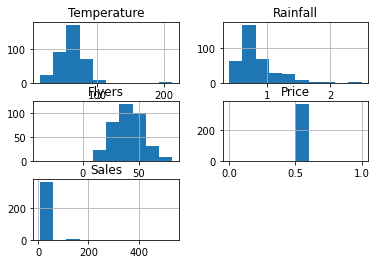

In [4]:
df.hist()

<AxesSubplot:>

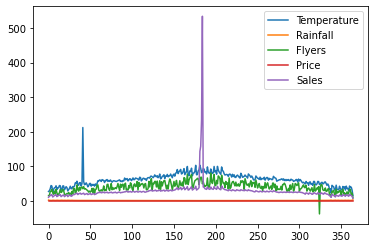

In [5]:
df.plot()

In [6]:
# Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. 
# The second argument is the multiplier, which should have a default argument of 1.5.

def get_lower_and_upper_bounds(df,col, m=1.5):
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3 - q1
    upper_value = q3 + (m * iqr)
    lower_value = q1 - (m * iqr)
    under_bound = df[df[col] < lower_value]
    over_bound = df[df[col] > upper_value]
    
    print(f'{col}, lower bound {lower_value}, over bound {upper_value}')
    
    return under_bound, over_bound

col = ['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']

In [7]:
# Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. 
# Do these lower outliers make sense?Which outliers should be kept?
df.columns.to_list()

['Date', 'Day', 'Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']

In [8]:
under_bound, over_bound = get_lower_and_upper_bounds(df, 'Temperature')

Temperature, lower bound 16.700000000000003, over bound 104.7


In [9]:
under_bound

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,12/31/17,Sunday,15.1,2.5,9,0.5,7


In [10]:
over_bound

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


In [11]:
under_bound, over_bound = get_lower_and_upper_bounds(df, 'Rainfall')

Rainfall, lower bound 0.26, over bound 1.3


In [12]:
under_bound

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [13]:
over_bound

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
11,1/12/17,Thursday,38.2,1.33,16,0.5,14
12,1/13/17,Friday,37.5,1.33,19,0.5,15
15,1/16/17,Monday,30.6,1.67,24,0.5,12
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14


In [14]:
under_bound, over_bound = get_lower_and_upper_bounds(df, 'Flyers')

Flyers, lower bound 4.0, over bound 76.0


In [15]:
under_bound

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


In [16]:
over_bound

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
194,7/14/17,Friday,92.0,0.50,80,0.5,40


In [17]:
under_bound, over_bound = get_lower_and_upper_bounds(df, 'Price')

Price, lower bound 0.5, over bound 0.5


In [18]:
under_bound

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [19]:
over_bound

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [20]:
under_bound, over_bound = get_lower_and_upper_bounds(df, 'Sales')

Sales, lower bound 5.0, over bound 45.0


In [21]:
under_bound

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [22]:
over_bound

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


In [25]:
for n in col:
    under_bound, over_bound = get_lower_and_upper_bounds(df, n)
    print(under_bound)

Temperature, lower bound 16.700000000000003, over bound 104.7
         Date     Day  Temperature  Rainfall  Flyers  Price  Sales
364  12/31/17  Sunday         15.1       2.5       9    0.5      7
Rainfall, lower bound 0.26, over bound 1.3
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
Flyers, lower bound 4.0, over bound 76.0
         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
324  11/21/17  Tuesday         47.0      0.95     -38    0.5     20
Price, lower bound 0.5, over bound 0.5
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
Sales, lower bound 5.0, over bound 45.0
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []


In [27]:
for n in col:
    under_bound, over_bound = get_lower_and_upper_bounds(df, n)
    print(over_bound)

Temperature, lower bound 16.700000000000003, over bound 104.7
       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
41  2/11/17  Saturday        212.0      0.91      35    0.5     21
Rainfall, lower bound 0.26, over bound 1.3
         Date        Day  Temperature  Rainfall  Flyers  Price  Sales
0      1/1/17     Sunday         27.0      2.00      15    0.5     10
1      1/2/17     Monday         28.9      1.33      15    0.5     13
2      1/3/17    Tuesday         34.5      1.33      27    0.5     15
5      1/6/17     Friday         25.3      1.54      23    0.5     11
6      1/7/17   Saturday         32.9      1.54      19    0.5     13
10    1/11/17  Wednesday         32.6      1.54      23    0.5     12
11    1/12/17   Thursday         38.2      1.33      16    0.5     14
12    1/13/17     Friday         37.5      1.33      19    0.5     15
15    1/16/17     Monday         30.6      1.67      24    0.5     12
16    1/17/17    Tuesday         32.2      1.43      26    0.

In [28]:
for n in col:
    under_bound, over_bound = get_lower_and_upper_bounds(df, n, m=3)
    print(over_bound)

Temperature, lower bound -16.299999999999997, over bound 137.7
       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
41  2/11/17  Saturday        212.0      0.91      35    0.5     21
Rainfall, lower bound -0.13, over bound 1.69
         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
0      1/1/17   Sunday         27.0      2.00      15    0.5     10
338   12/5/17  Tuesday         22.0      1.82      11    0.5     10
343  12/10/17   Sunday         31.3      1.82      15    0.5     11
364  12/31/17   Sunday         15.1      2.50       9    0.5      7
Flyers, lower bound -23.0, over bound 103.0
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
Price, lower bound 0.5, over bound 0.5
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
Sales, lower bound -10.0, over bound 60.0
       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
181  7/1/17  Saturday        102.9      0.